# **Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.**

In [111]:
# Import the libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf


In [112]:
def adj_r2(x,y,regression):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [113]:
# Load the data

boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']=boston.target

In [114]:
# Checking the data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [115]:
# Checking for null values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [116]:
# Checking the summary of the data set

bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

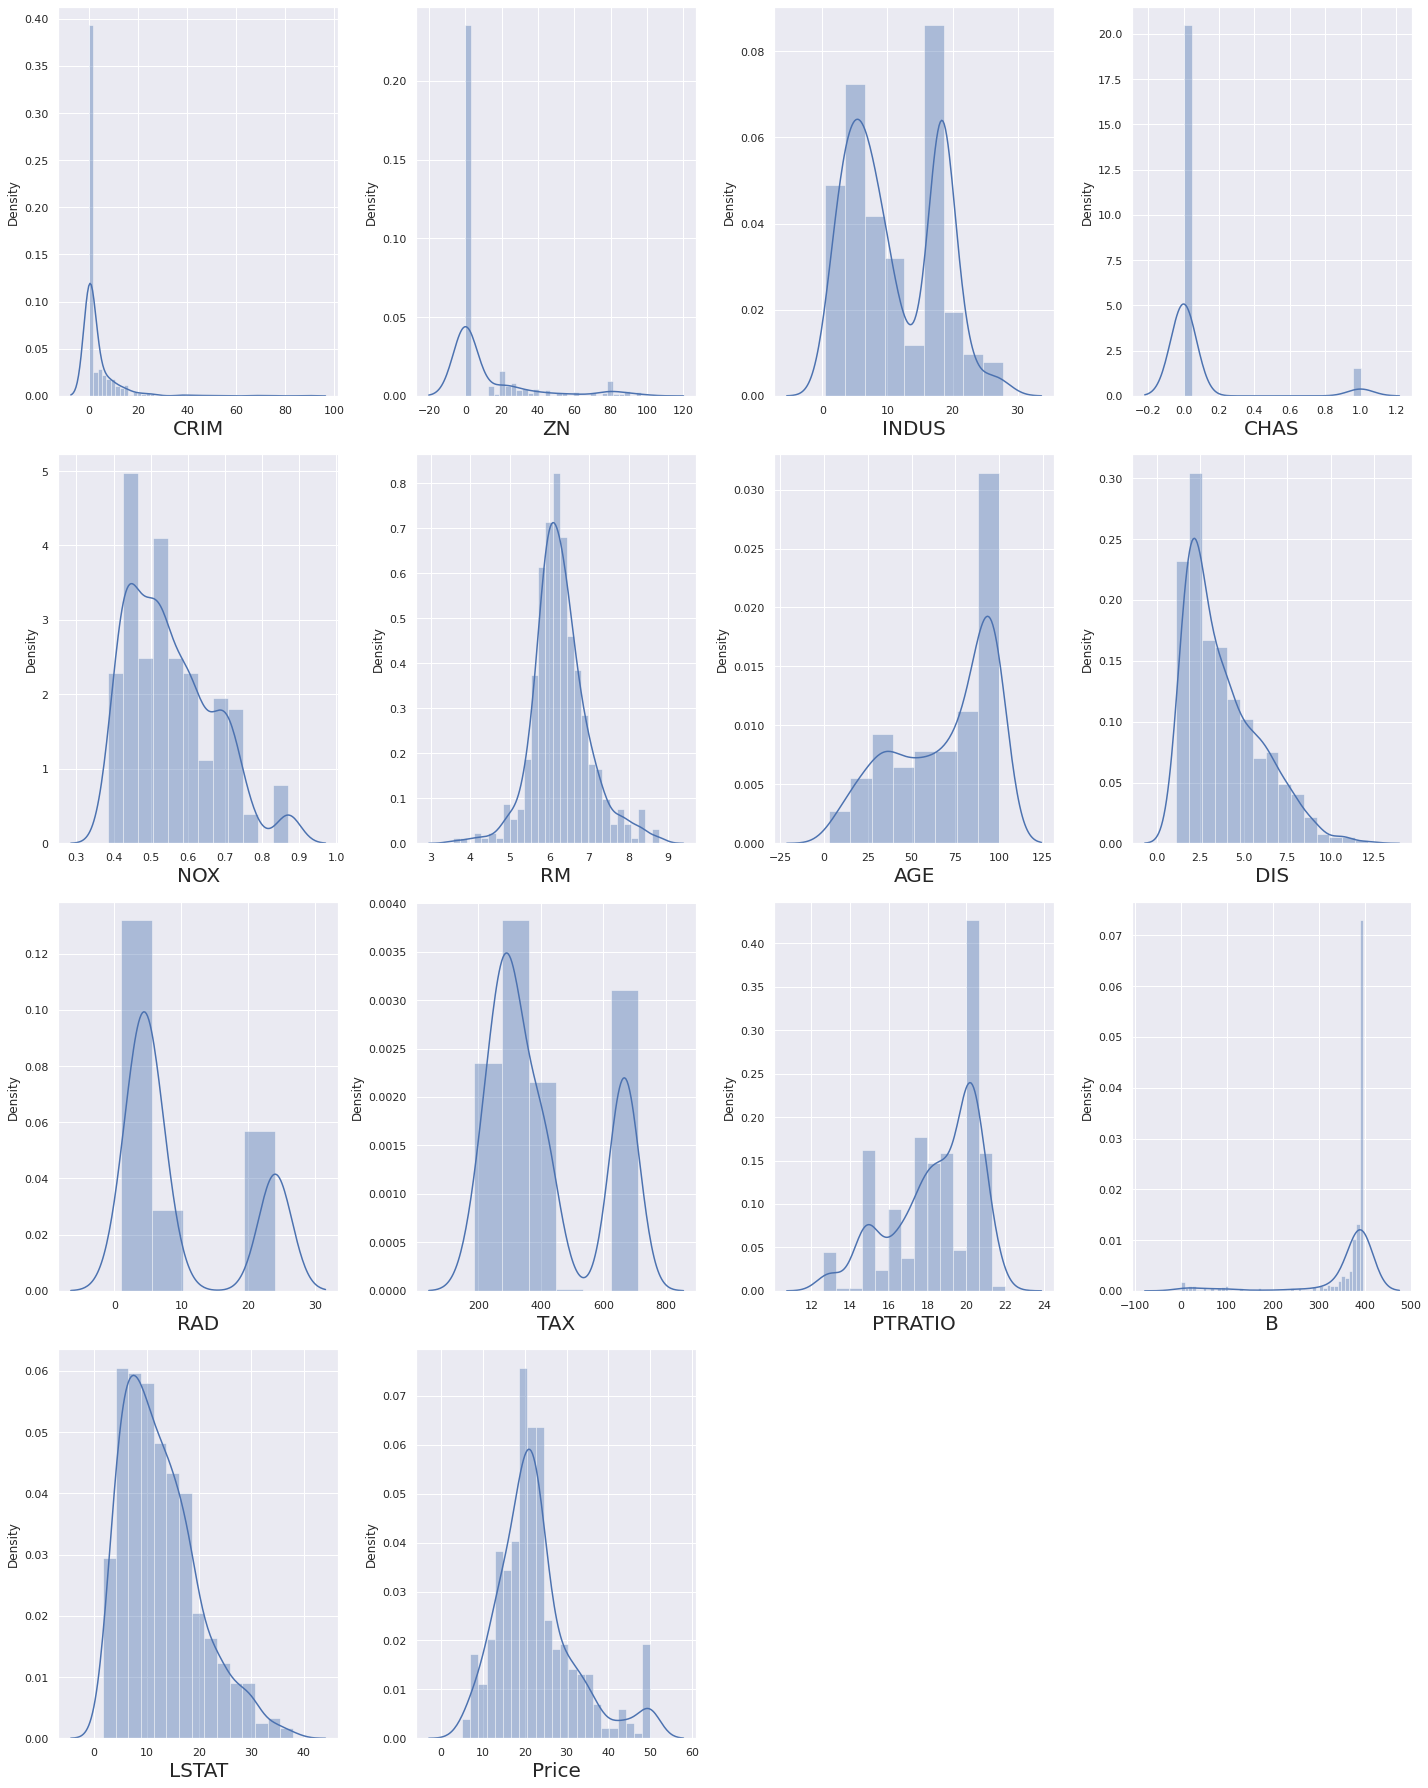

In [117]:
# Visualization of the various parameters

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [118]:
# Seperating the independent and dependent variables

y = bos['Price']
X = bos.drop(columns = ['Price'])


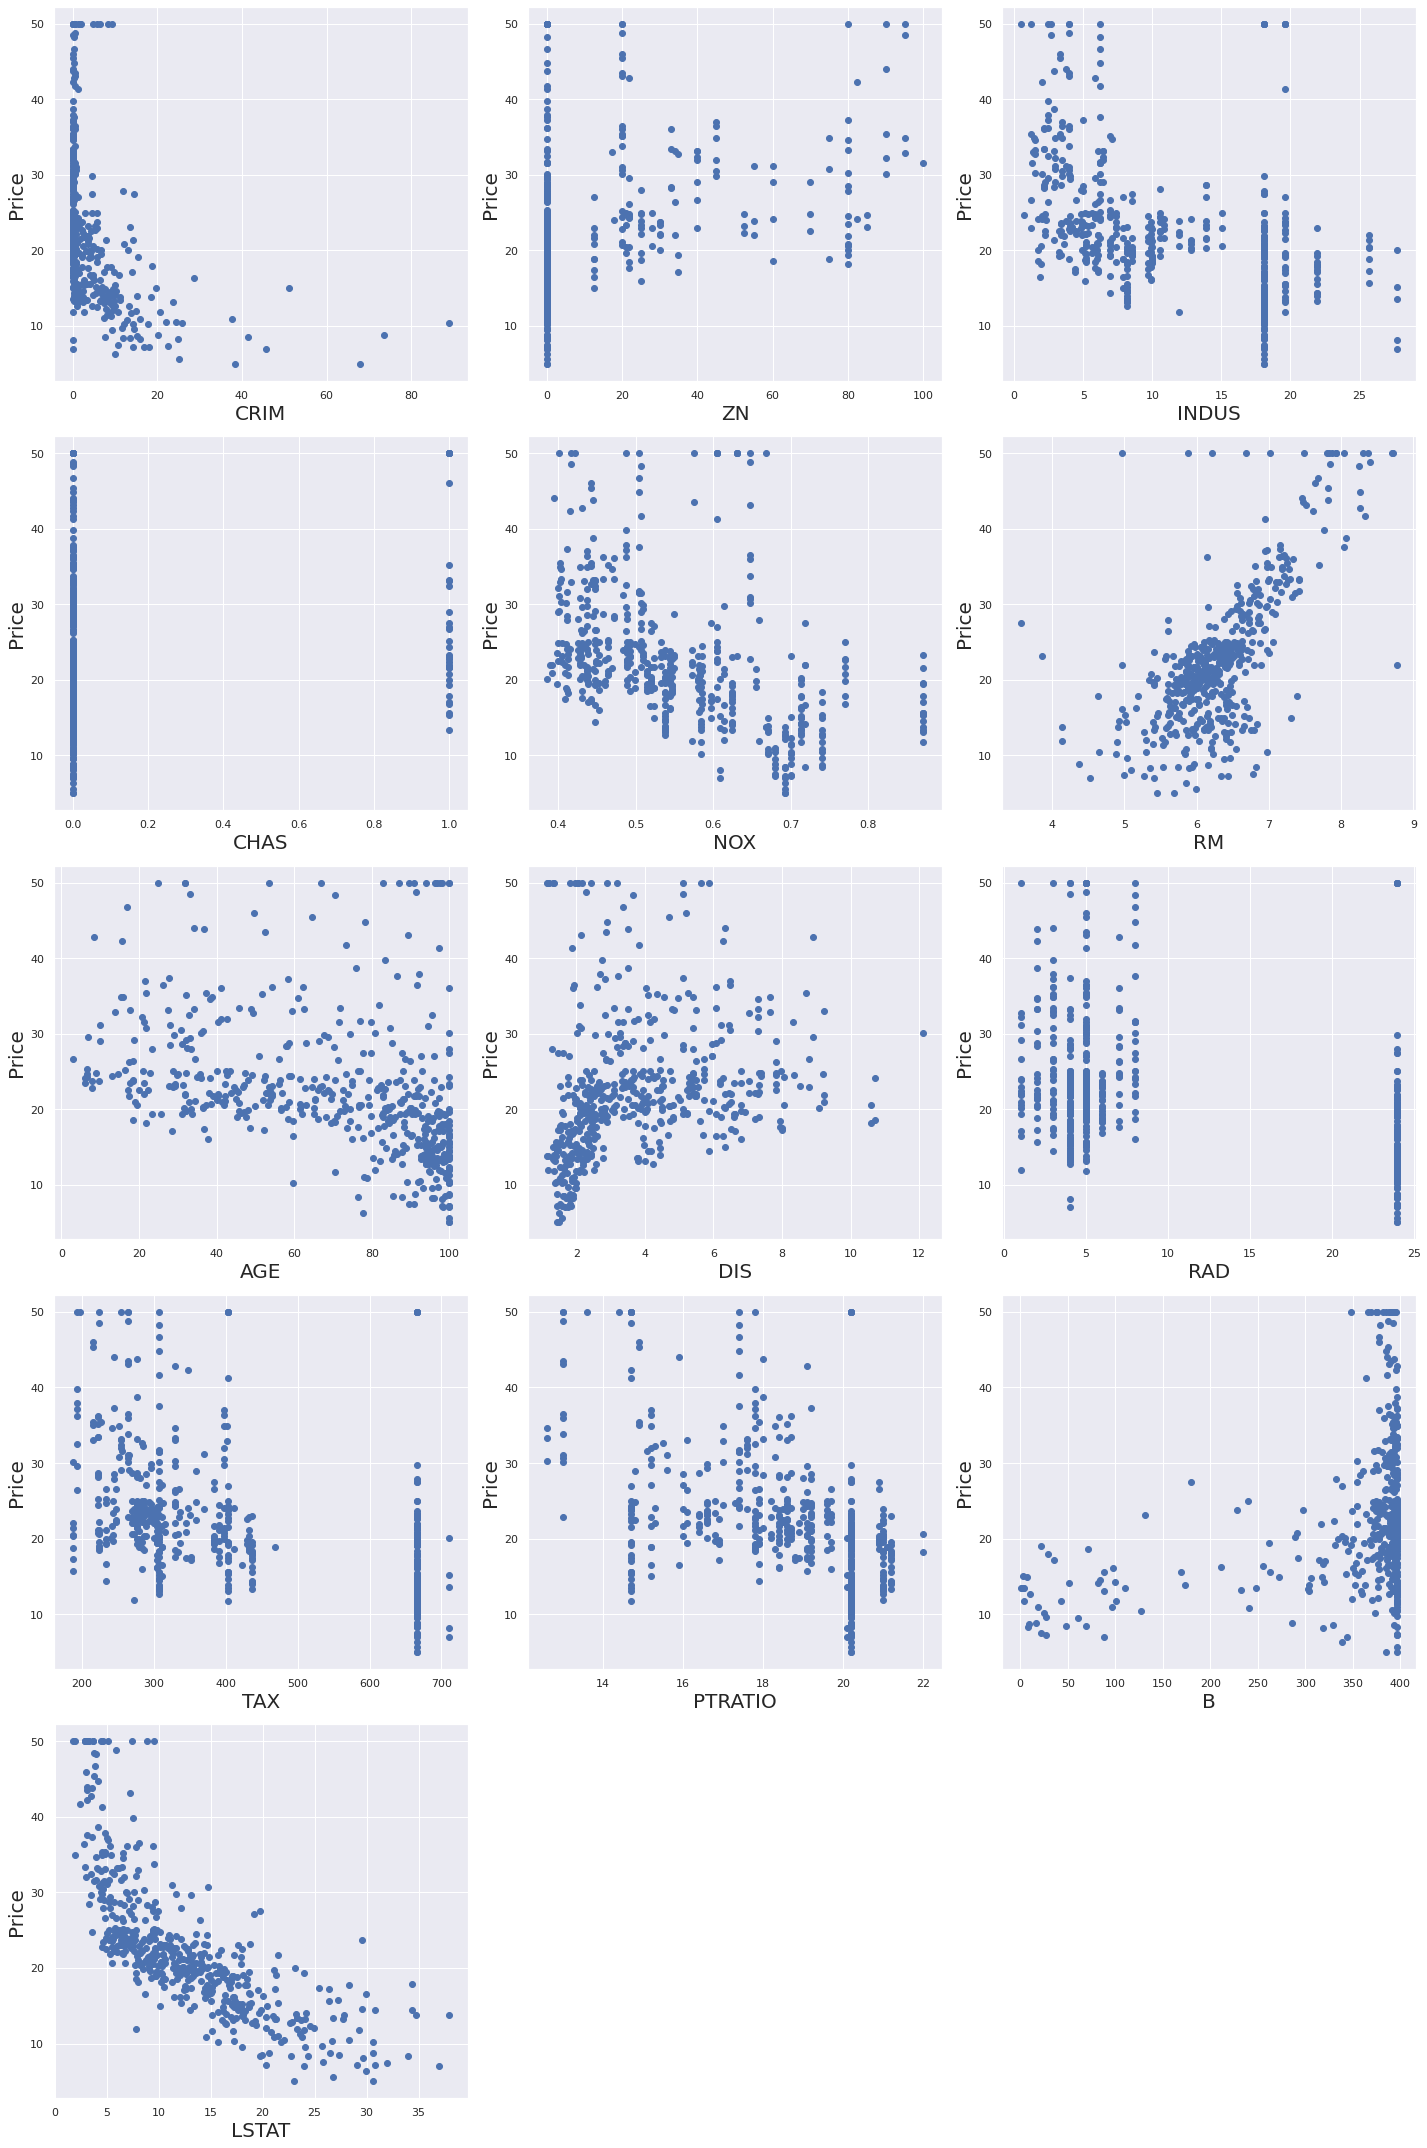

In [119]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [120]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [121]:
vif=pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We have 2 features - RAD & TAX whose VIF is greater than 5. Let's also re-confirm it with a correlation heatmap.

<AxesSubplot:>

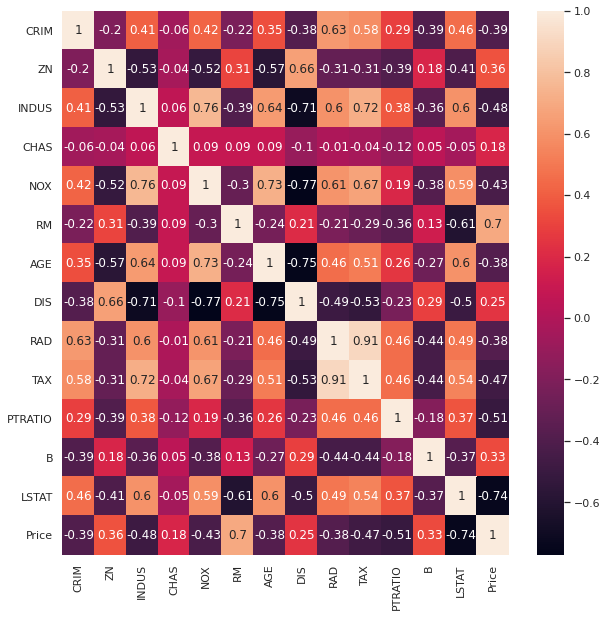

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=bos.corr().round(2), annot=True,ax=ax)

We can clearly see that RAD & TAX are highly correlated with each other, so our initial suspicions are TRUE, and we will drop these from our dataset.

In [123]:
# Dropping the columns RAD & TAX from X & scaling them
X=X.drop(['RAD','TAX'],axis=1)
X_scaled=scaler.fit_transform(X)

In [124]:
vif=pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


In [125]:
#Splitting into test and train data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [126]:
# Applying Linear Regresison

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [127]:
# Training data scores

print("R2 Score for Training dataset: ",regression.score(x_train,y_train))
print("Adjusted R2 score for Training dataset: ",adj_r2(x_train,y_train,regression))

R2 Score for Training dataset:  0.7221847012235341
Adjusted R2 score for Training dataset:  0.7138578121593893


In [128]:
# Test data scores

print("R2 Score for Test dataset: ",regression.score(x_test,y_test))
print("Adjusted R2 score for Test dataset: ",adj_r2(x_test,y_test,regression))

R2 Score for Test dataset:  0.7325448326094592
Adjusted R2 score for Test dataset:  0.7069621644242771


We see that the adjusted R2 score is slightly less for our test data. Let's see if our model is overfitting our training data.

In [129]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)


# best alpha parameter
alpha = lasscv.alpha_
alpha


#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_test, y_test)

0.7327698623259937

Our r2_score for test data (73.28%) comes almost same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [130]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)


ridge_model.score(x_test, y_test)

0.7325275415833694

We got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [131]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
elasticnet_reg.score(x_test, y_test)

0.7295309009805893

Even after using different types of regularisation techniques we are getting the same r2 score approximately, Hence we can conclude that our model is not overfitted.

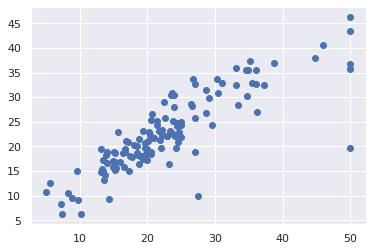

In [132]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, regression.predict(x_test))
plt.show()